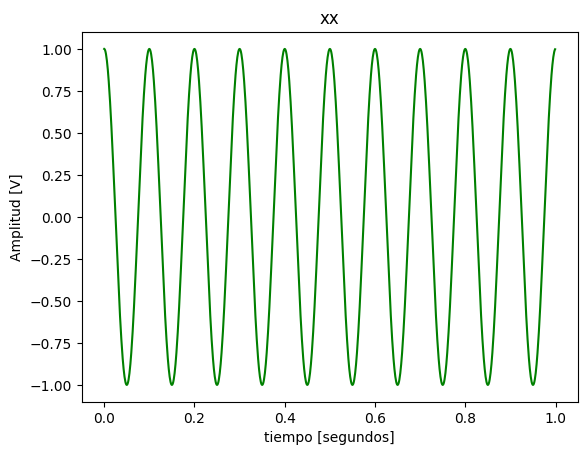

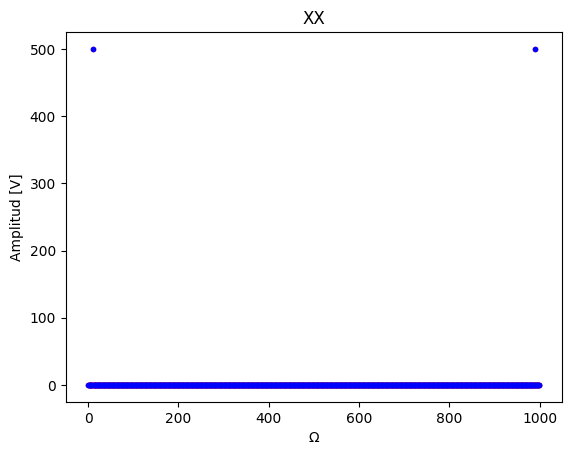

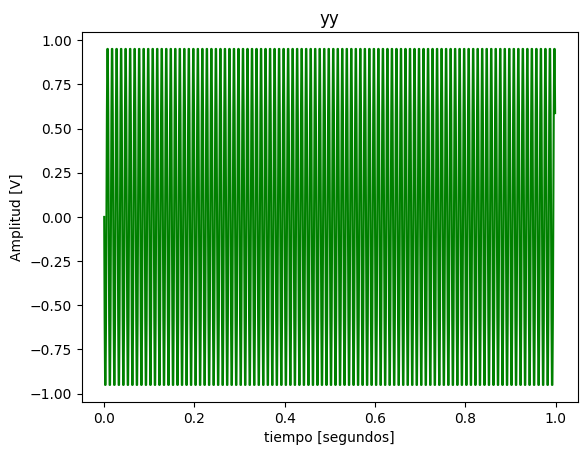

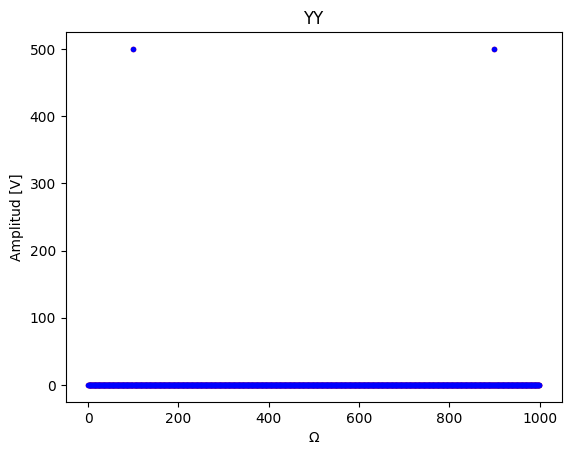

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 29 14:26:15 2022

@author: Guilleromo
"""

#Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

#XX = mi_funcion_DFT( xx )
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 29 14:26:15 2022

@author: Guillermo Daniel Spagnolo
         daniespagnolo@frba.utn.edu.ar
"""

#Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

#XX = mi_funcion_DFT( xx )

#xx: señal a analizar, una matriz (Nx1) de números reales. 
#XX: DFT de xx, una matriz (Nx1) de números complejos.




import numpy as np
import matplotlib.pyplot as plt
# import muestreoSenoidal.py
from numpy.fft import fft
# import mi_funcion_sen(vmax , dc , ff, ph, nn , fs ) from muestreoSenoidal.py
ph=np.pi
N  = 1000  #         muestras
fs = 1000   #Hz#  frec muestreo
Ts = 1/fs#      periodo#0.001=1/1000
# ----------------------


def mi_funcion_sen( vmax , dc , ff, ph, nn , fs ):#funcion senoidal 

    ts = 1/fs
    tt = np.linspace(0,(N-1)*ts,nn) #0 a (N-1)*Ts)

    #tt = np.linspace(0,2*np.pi,num=nn)
    xx = dc + vmax*np.sin(2*np.pi*ff*tt + ph)
    return (tt, xx)
    
def mi_funcion_DFT(xx):
    
    nn = xx.shape[0]#len de xx    
    XX = 1j*np.zeros(nn)#llena de 0
    e  = 1j*np.zeros(nn)#llena de 0
    n=np.linspace(0,(nn-1),nn)
    
    for k in range(nn):
        e = np.exp(-2j * np.pi * k * n / nn)
        XX[k]=np.dot(xx, e)
                      
    return XX

# #---------------------
[tt,xx] = mi_funcion_sen(vmax = 1, dc = 0, ff = 10, ph=ph/2, nn = N, fs = fs)#----COSENOIDAL
XX = mi_funcion_DFT( xx )

#PLOTEO DE xx
plt.figure(1)
plt.title('xx')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')  
plt.plot(tt,xx,"g")
plt.show()
#PLOTEO DE XX
plt.figure(2)
plt.title('XX')
plt.xlabel('Ω')
plt.ylabel('Amplitud [V]') 
plt.plot(np.abs(XX),"r.")
#PLOTEO DE XX en FFT NUMPY
plt.figure(2 )
X = fft(xx)
plt.plot(np.abs(X),"b.")
plt.show()

# Funcion senoidal yy 
[cc,yy] = mi_funcion_sen(vmax = 1, dc = 0, ff = 100, ph=ph, nn = N, fs = fs)
YY = mi_funcion_DFT( yy )
#PLOTEO DE yy
plt.figure(3)
plt.title('yy')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')  
plt.plot(cc,yy,"g")
#PLOTEO DE YY
plt.figure(4)
plt.title('YY')
plt.xlabel('Ω')
plt.ylabel('Amplitud [V]') 
plt.plot(np.abs(YY),"r.")
#PLOTEO DE YY en FFT NUMPY
plt.figure(4 )
Y=fft(yy)
plt.plot(np.abs(Y),"b.")
plt.show()
